# XGBoost Model

#### What is XGBoost?

XGBoost (Extreme Gradient Boosting) is a popular gradient boosting framework that is designed to optimize performance and speed in tree ensemble learning algorithms. It uses a combination of gradient boosting and regularization techniques to prevent overfitting and improve model accuracy. XGBoost has become a popular choice for machine learning competitions and is widely used in industry for its performance and scalability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer

## Functions to calculate TPR and FPR

In [2]:
def get_TPR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    TPR = (TP/(TP+FN))
    
    return TPR
    
def get_FPR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    FPR = (FP/(FP+TN))
    
    return FPR

In [3]:
data = pd.read_csv('SMData.csv')
df = data
data.columns

Index(['Unnamed: 0', ' Debt ratio %', ' Borrowing dependency',
       ' Liability to Equity', ' Net Income to Stockholder's Equity',
       ' Persistent EPS in the Last Four Seasons',
       ' ROA(C) before interest and depreciation before interest',
       ' Net worth/Assets',
       ' ROA(B) before interest and depreciation after tax',
       ' ROA(A) before interest and % after tax',
       ' Net Income to Total Assets', 'Bankrupt?'],
      dtype='object')

In [4]:
y = pd.DataFrame(data['Bankrupt?'])
x = df.drop(['Bankrupt?'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2023)

In [5]:
XGBModel = XGBClassifier()

In [6]:
XGBModel.fit(x_train, y_train)

y_pred = XGBModel.predict(x_test)

XGBoost Classifier Confusion Matrix
Classification Accuracy:  0.9833333333333333
TPR:  0.9780724120346762
FPR:  0.01150575287643822


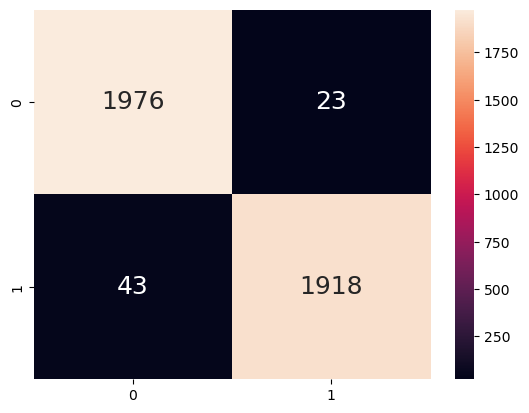

In [7]:
print("XGBoost Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18})

print("Classification Accuracy: ", XGBModel.score(x_test, y_test))
print('TPR: ', get_TPR(y_test, y_pred))
print('FPR: ', get_FPR(y_test, y_pred))

In [8]:
print('XGBoost TEST F1 Score: {}'.format(f1_score(y_test,y_pred)))

XGBoost TEST F1 Score: 0.983085597129677
